C:\Users\Akshay\anaconda3\envs\tensorflow\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

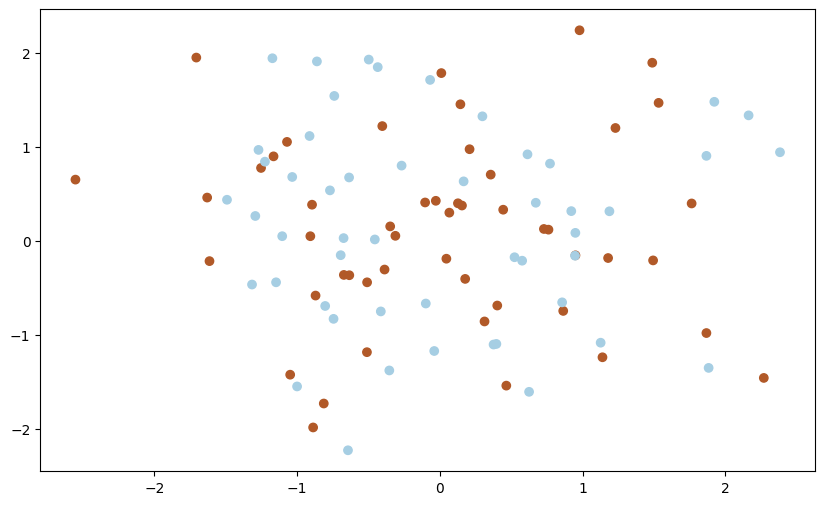

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.concatenate([np.ones(50), -np.ones(50)])

# Step 2: Formulate SVM Optimization Problem
def hard_SVM(X, y):
    m = X.shape[0]
    n = X.shape[1]
    w = cp.Variable(n)
    b = cp.Variable()
    C = cp.Parameter(nonneg=True)
    C.value = 1

    objective = cp.Minimize(0.5 * cp.norm(w)**2 + C * cp.sum(cp.pos(1 - cp.multiply(y, X @ w + b))))
    constraints = []

    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value, b.value

def soft_SVM(X, y, C):
    m = X.shape[0]
    n = X.shape[1]
    w = cp.Variable(n)
    b = cp.Variable()

    objective = cp.Minimize(0.5 * cp.norm(w)**2 + C * cp.sum(cp.pos(1 - cp.multiply(y, X @ w + b))))
    constraints = []

    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value, b.value

# Step 3: Implement SVM using CVXpy
w_hard, b_hard = hard_SVM(X, y)
w_soft, b_soft = soft_SVM(X, y, C=1)

# Step 4: Visualize Optimal Hyperplane
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot decision boundary for hard SVM
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z_hard = np.sign(xx1.ravel() @ w_hard[0] + xx2.ravel() @ w_hard[1] + b_hard)
Z_hard = Z_hard.reshape(xx1.shape)
plt.contour(xx1, xx2, Z_hard, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors for hard SVM
margin_hard = 1 / np.sqrt(np.sum(w_hard**2))
support_vecs_hard = X[np.abs(X @ w_hard + b_hard) <= 1]
plt.scatter(support_vecs_hard[:, 0], support_vecs_hard[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot decision boundary for soft SVM
Z_soft = np.sign(xx1.ravel() @ w_soft[0] + xx2.ravel() @ w_soft[1] + b_soft)
Z_soft = Z_soft.reshape(xx1.shape)
plt.contour(xx1, xx2, Z_soft, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors for soft SVM
margin_soft = 1 / np.sqrt(np.sum(w_soft**2))
support_vecs_soft = X[np.abs(X @ w_soft + b_soft) <= 1]
plt.scatter(support_vecs_soft[:, 0], support_vecs_soft[:, 1], s=100, facecolors='none', edgecolors='r')

plt.title('Optimal Hyperplane with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 5: Calibrate λ Parameter (soft formulation)
# Experiment with different values of C parameter in soft_SVM function
